# About
This notebook generates the figures in Fig. S10, however, we are re-vamping the domain decomposition code at the moment so I recommend if this is an area you're interested in to contact Alex directly about this.

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from tqdm import tqdm
import pickle
from sparrow import Protein
import protfasta
import metapredict as meta
from scipy.signal import convolve2d

import metapredict as meta

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sparrow import Protein

from finches import Mpipi_frontend
from finches import CALVADOS_frontend
from finches.frontend import interlogo
mf = Mpipi_frontend()
cf = CALVADOS_frontend()

from finches.domain_decomposition import domain_analysis
from finches.frontend import interlogo

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


QHPPVPPAAAGPLAGQPRKSSSSRRNAWGNLSYADLITKAIESSAEKRLTLSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQE
QHPPVPPAAAGPLAGQPRKSSSSRRNAWGNLSYADLITKAIESSAEKRLTLSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQE

VKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQE
AKKKASLQSGQEGAGDSPGSQFSKWPASPGSHSNDDFDNWSTFRPRTSSNASTISGRLSPIMTEQDDLGEGDVHSMVYPPSAAKMASTLPSLSEISNPENMENLLDNLNLLSSPTSLTVSTQSSPGTMMQQTPCYSFAPPNTSLNSPSPNYQKYTYGQSSMSPLPQMPIQTLQDNKSSYGGMSQYNCAPGLLKELLTSDSPPHNDIMTPVDPGVAQPNSRVLGQNVMMGPNSVMSTYGSQASHNKMMNPSSHTHPGHA

AEKRLTLSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEGAGDSPGSQFSKWPAS
MPHTSGMNRLTQVKTPVQVPLPHPMQMSALGGYSSVSSCNGYGRMGLLHQEKLPSDLDGMFIERLDCDMESIIRNDLMDGDTLDFNFDNVLPNQSFPHSVKTTTHSWVSG

AKKKASLQSGQEGAGDSPGSQFSKWPASPGSHSNDDFDNWSTFRPRTSSNASTISGRLSPIMTEQDDLGEGDVHSMVYPPSAAKMASTLPSLSEISNPENMENLLDNLN

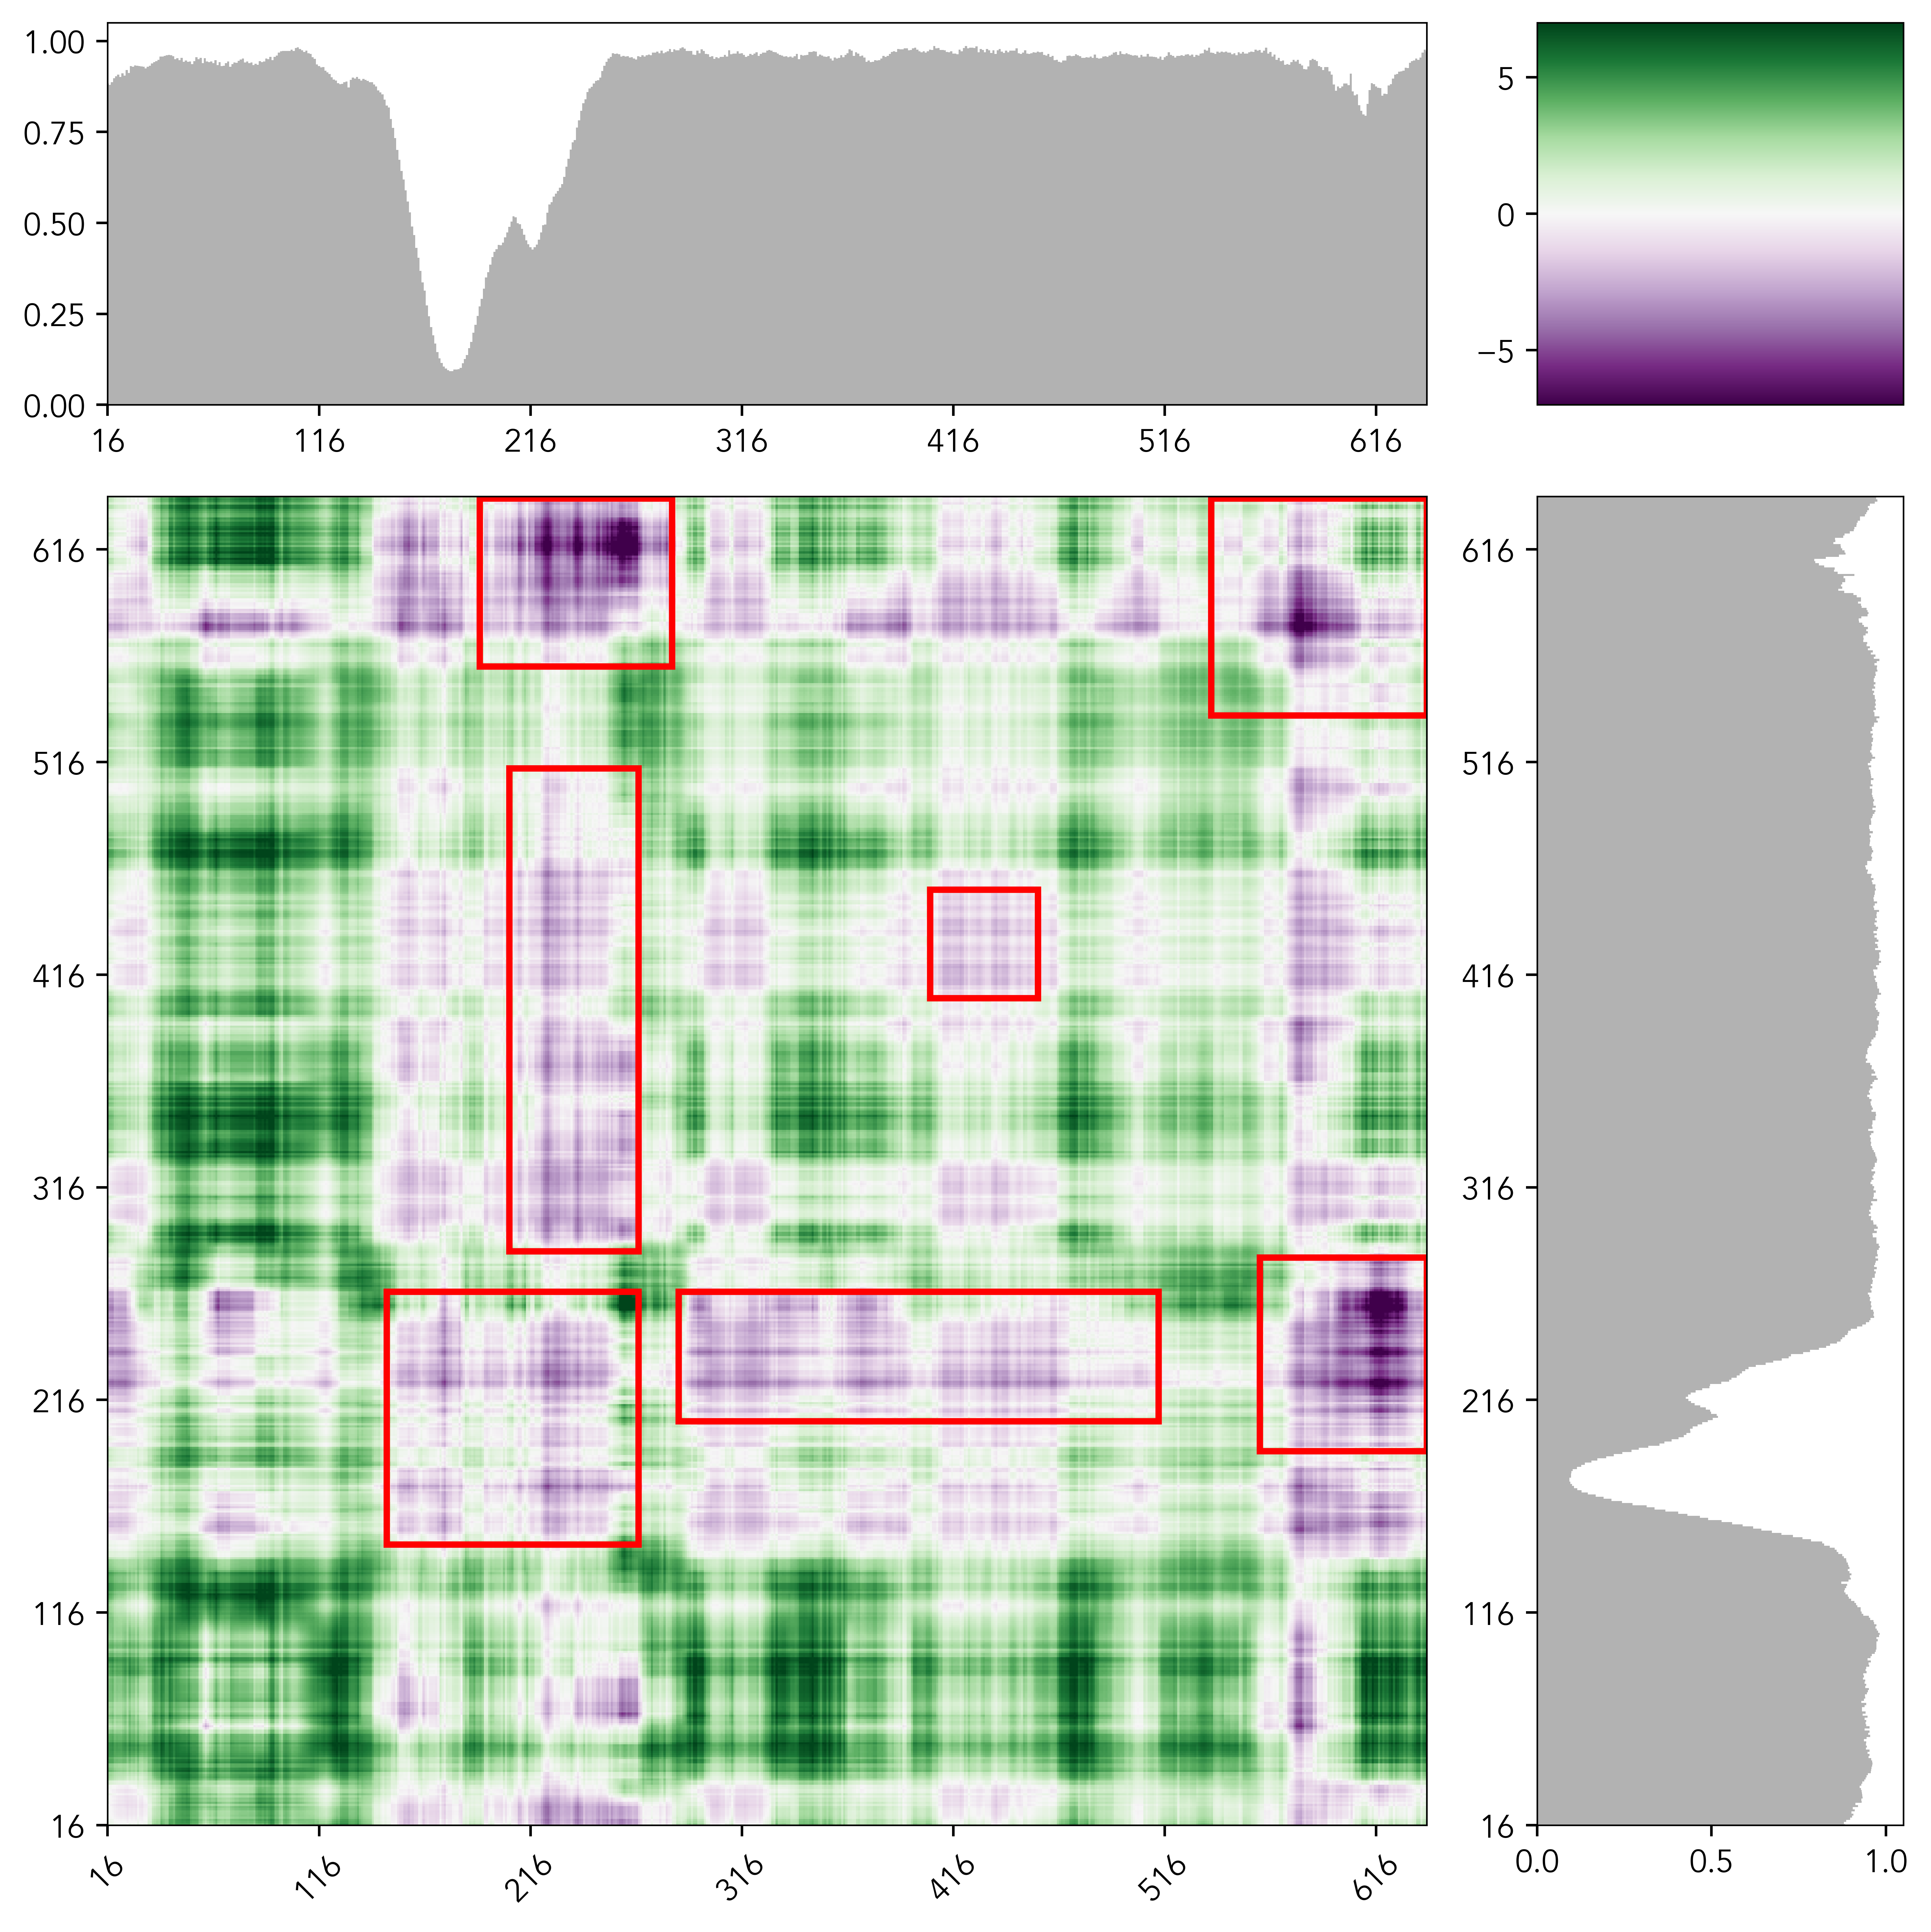

In [2]:
# https://www.uniprot.org/uniprotkb/Q12778/
foxo1 ='MAEAPQVVEIDPDFEPLPRPRSCTWPLPRPEFSQSNSATSSPAPSGSAAANPDAAAGLPSASAAAVSADFMSNLSLLEESEDFPQAPGSVAAAVAAAAAAAATGGLCGDFQGPEAGCLHPAPPQPPPPGPLSQHPPVPPAAAGPLAGQPRKSSSSRRNAWGNLSYADLITKAIESSAEKRLTLSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEGAGDSPGSQFSKWPASPGSHSNDDFDNWSTFRPRTSSNASTISGRLSPIMTEQDDLGEGDVHSMVYPPSAAKMASTLPSLSEISNPENMENLLDNLNLLSSPTSLTVSTQSSPGTMMQQTPCYSFAPPNTSLNSPSPNYQKYTYGQSSMSPLPQMPIQTLQDNKSSYGGMSQYNCAPGLLKELLTSDSPPHNDIMTPVDPGVAQPNSRVLGQNVMMGPNSVMSTYGSQASHNKMMNPSSHTHPGHAQQTSAVNGRPLPHTVSTMPHTSGMNRLTQVKTPVQVPLPHPMQMSALGGYSSVSSCNGYGRMGLLHQEKLPSDLDGMFIERLDCDMESIIRNDLMDGDTLDFNFDNVLPNQSFPHSVKTTTHSWVSG'
seq = foxo1 


[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(cf, seq, seq, criteria_threshold=-1, min_region_size=50)
cf.interaction_figure(seq, seq, plot_rectangles=[i.rectangle_info for i in interactor_pairs],zero_folded=False, vmin=-7, vmax=7, fname='out_figures/FOXO1_attractive_calvados.pdf')

for i in interactor_pairs:
    print(i.r1_sequence_full)
    print(i.r2_sequence_full)
    print('')

MAEAPQVVEIDPDFEPLPRPRSCTWPLPRPEFSQSNSATSSPAPSGSAAANPDAAAGLPSAS
LQSGQEGAGDSPGSQFSKWPASPGSHSNDDFDNWSTFRPRTSSNASTISGRLSPI

SAAANPDAAAGLPSASAAAVSADFMSNLSLLEESEDFPQAPGSVAAAVAAAAAAAATGGLCGDFQG
GTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEG

HPAPPQPPPPGPLSQHPPVPPAAAGPLAGQPRKSSSSRRNAWGNLSYADLITKAIESSAEKRL
GLLHQEKLPSDLDGMFIERLDCDMESIIRNDLMDGDTLDFNFDNVLPNQSFPHSVKTTTHSWVS

GTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEG
SAAANPDAAAGLPSASAAAVSADFMSNLSLLEESEDFPQAPGSVAAAVAAAAAAAATGGLCGDFQG

AEKRLTLSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEGAGDSPGSQFSKWPASPGSHSNDDFDNWSTFRPRTSSNASTISGRLSPIMTEQDDLGEGDVHSMVYPPSAAKMASTLPSLSEISNPENMEN
AEKRLTLSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEGAGDSPGSQFSKWPASPGSHSNDDFDNWSTFRPRTSSNASTISGRLSPIMTEQDDLGEGDVHSMVYPPSAAKMASTLPSLSEISNPENMEN

LSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEGAGDSPG

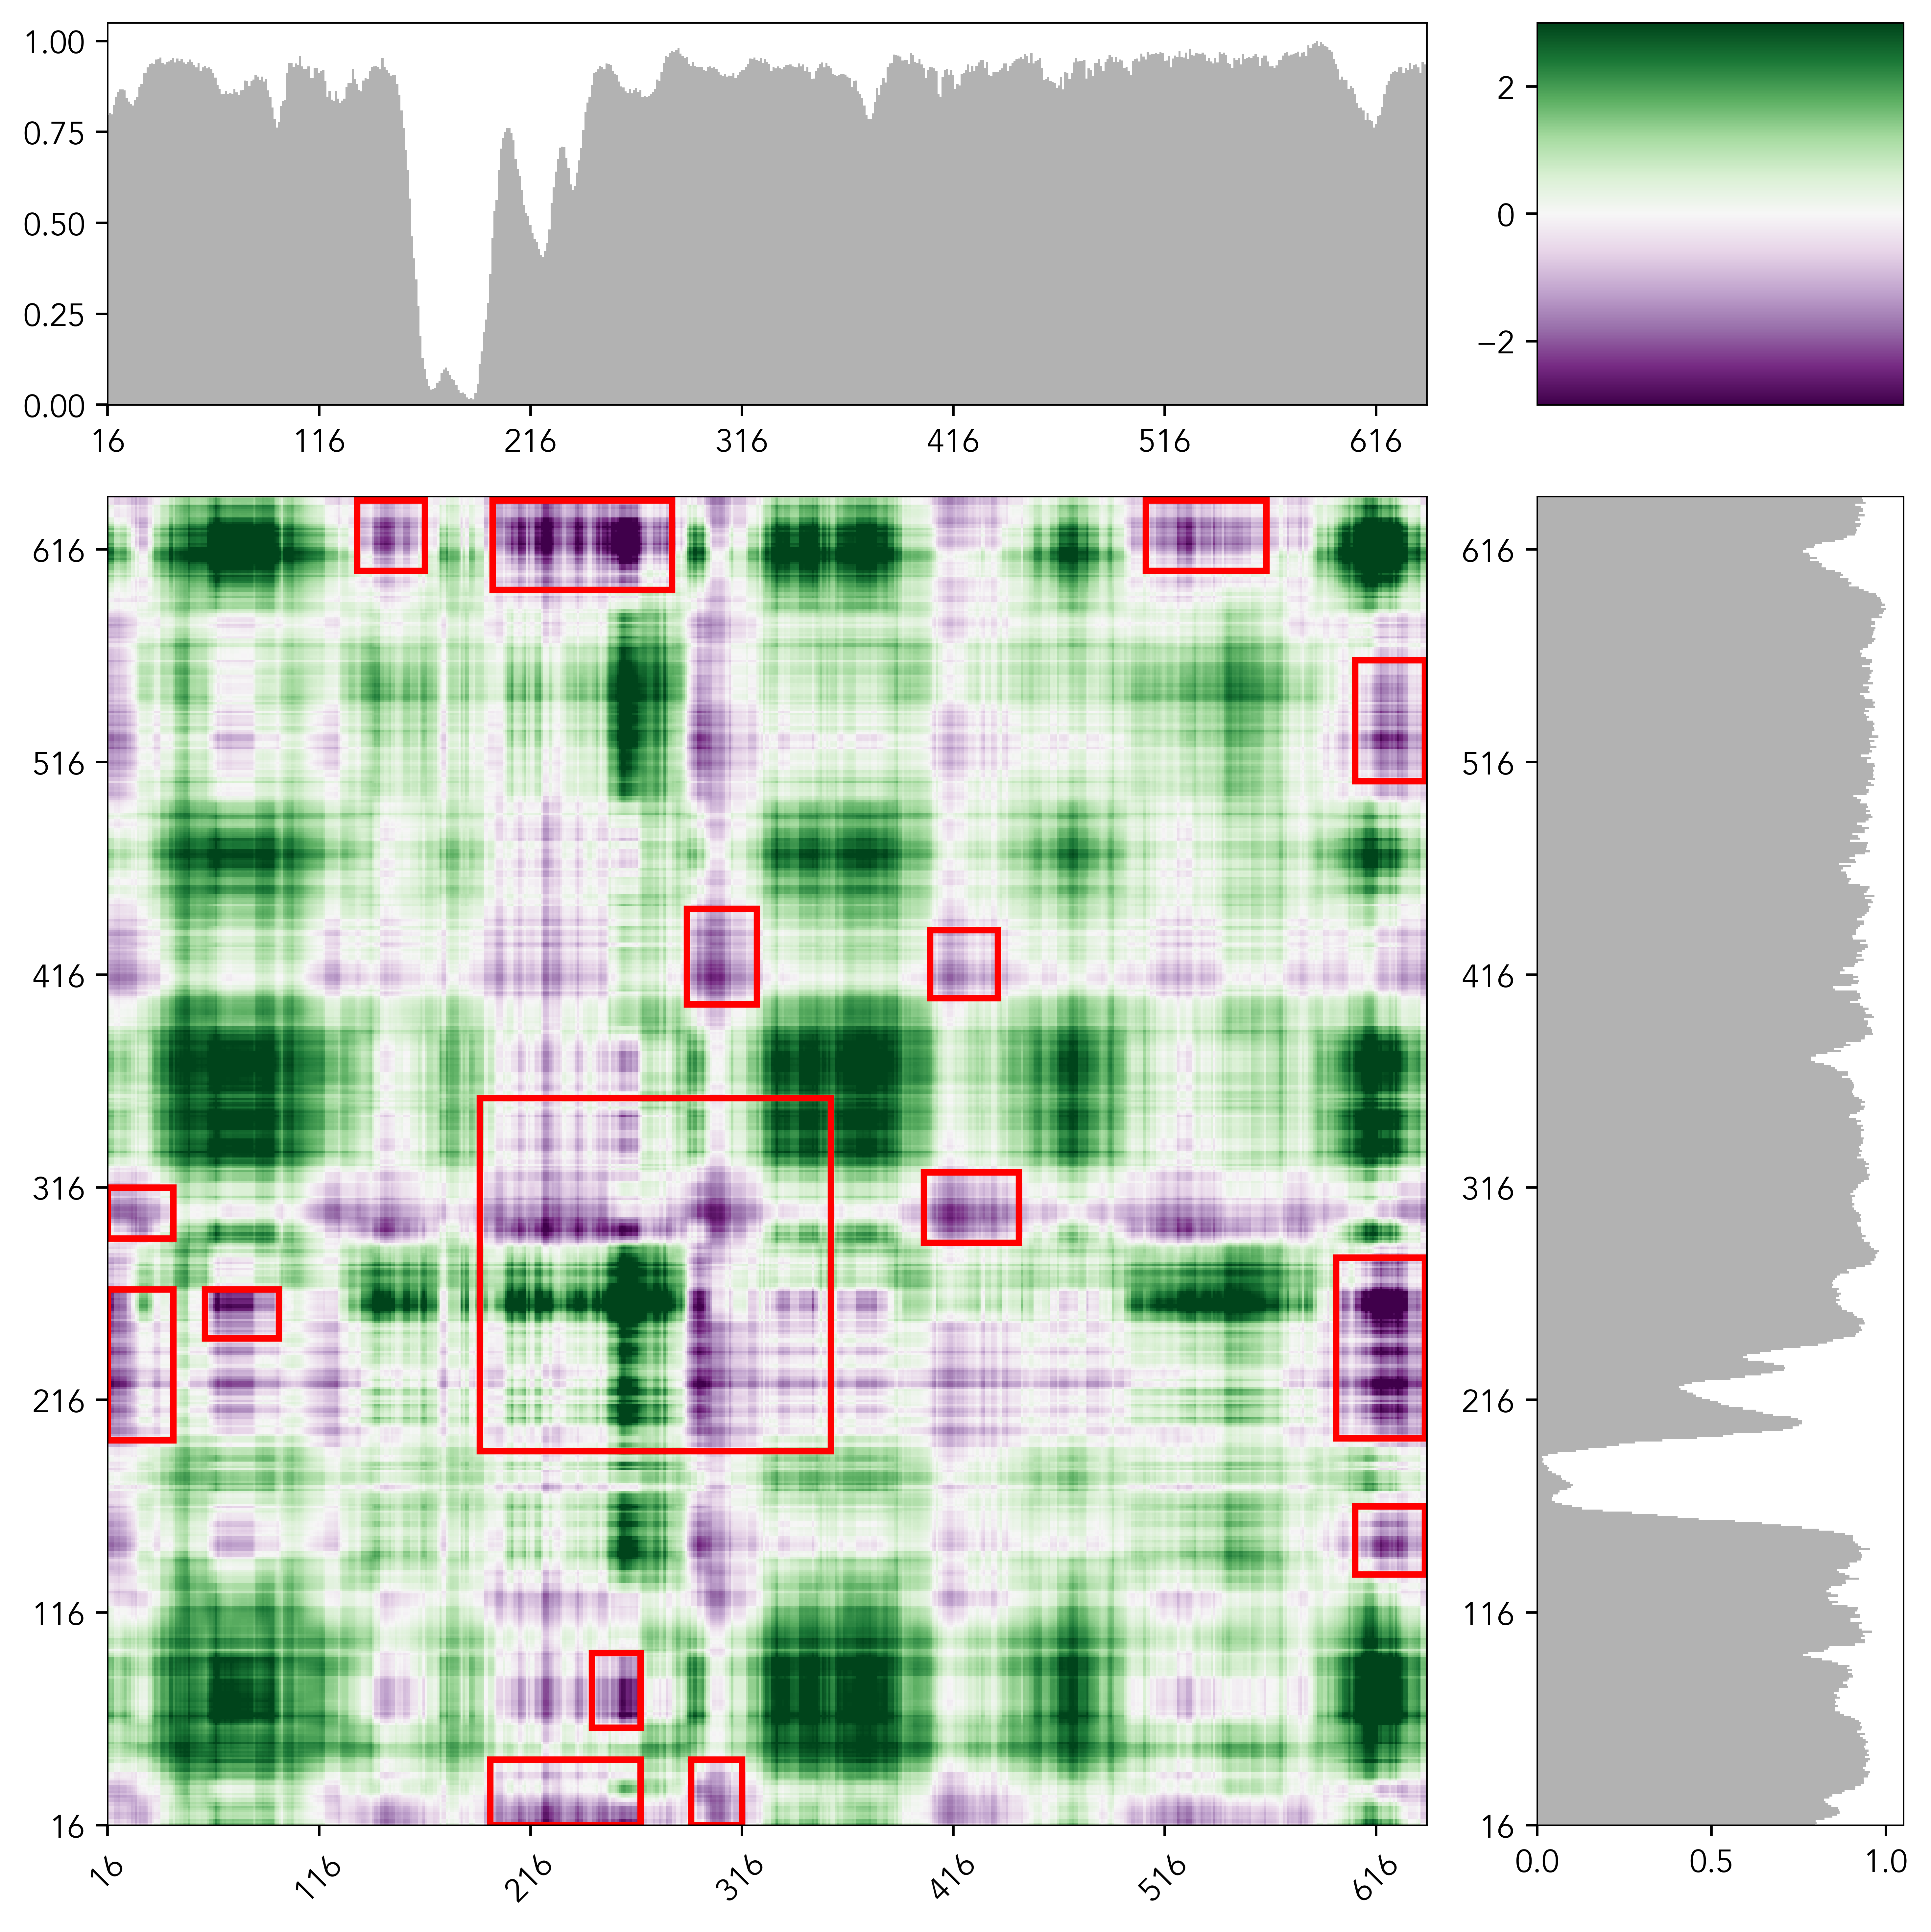

In [47]:
# https://www.uniprot.org/uniprotkb/Q12778/
seq = foxo1 


[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, seq, seq, criteria_threshold=-1)
mf.interaction_figure(seq, seq, plot_rectangles=[i.rectangle_info for i in interactor_pairs],zero_folded=False, vmin=-3, vmax=3, fname='out_figures/FOXO1_attractive_mpipi.pdf')

for i in interactor_pairs:
    print(i.r1_sequence_full)
    print(i.r2_sequence_full)
    print('')

(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

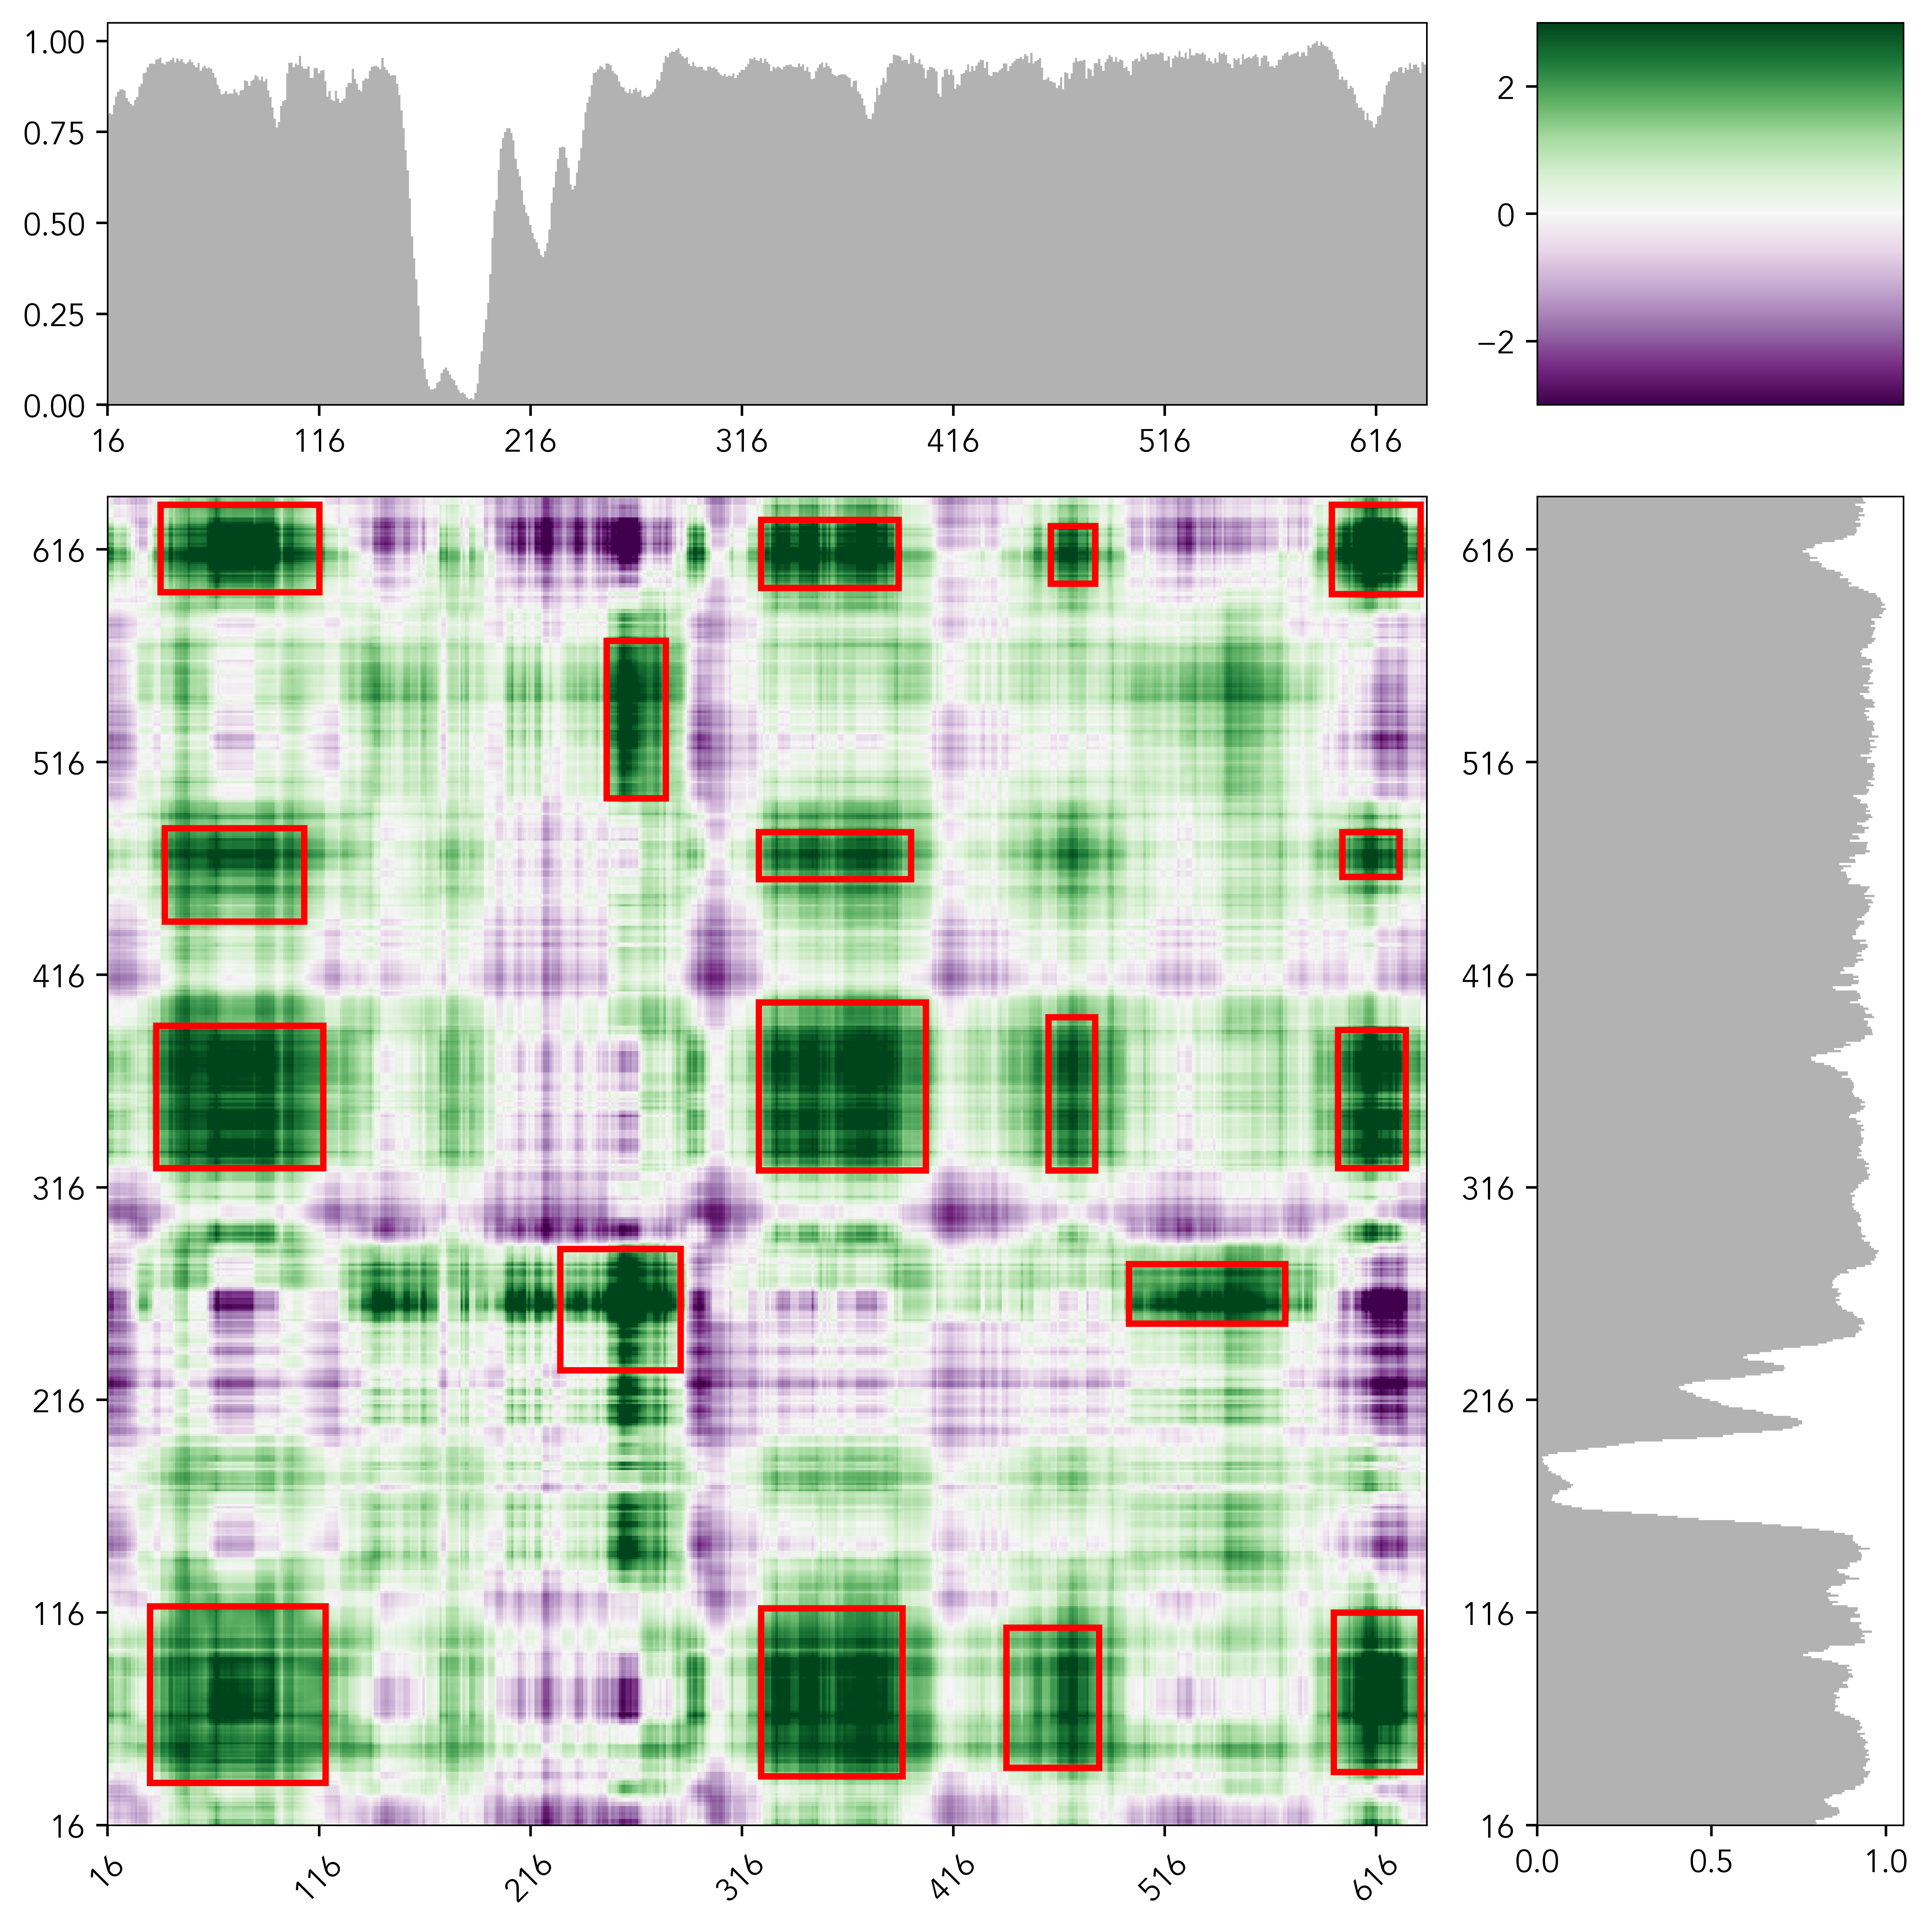

In [24]:
[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, seq, seq, criteria_threshold=2.0, criteria='greater')
mf.interaction_figure(seq, seq, plot_rectangles=[i.rectangle_info for i in interactor_pairs],zero_folded=False, vmin=-3, vmax=3, fname='out_figures/FOXO1_repulsive.pdf')


### CALVADOS sequence logo

In [49]:
interlogo.plot_attractive_logo(seq, seq, cf)


### Mpipi sequence logo

In [48]:
interlogo.plot_attractive_logo(seq, seq, mf)